## Objective Function:

Maximizing the revenue, given as the difference between the reward (profit) and the cost per click times the clicks ( costs ). 

It can be expressed as :
### $ max_{price,bid}( \sum \limits_{C_i} (price \times soldItems(bid, price)) - (clicks(bid) \times costPerClick(bid))) $





(price, bid) for each customer class ; 

#in theory we know, but actually we don't 


In [2]:
from customerManager import CustomerManager
customer_path = "./config/customer_classes.json"
cManager = CustomerManager(file_path = customer_path)
cManager.clicks(class_id = 0, bid= 5)

128.60812022740112

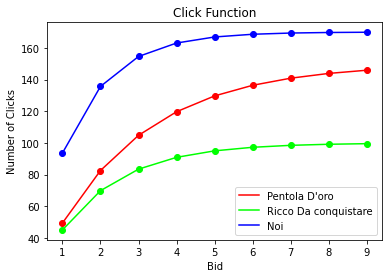

In [5]:
import matplotlib.pyplot as plt
import numpy as np

#Plotting of click function
X = np.arange(1,10)
Y = []
for c in cManager.classes:
    Y.append([])
    for x in X:
        Y[c["class_id"]].append(cManager.clicks(c["class_id"], bid = x, noise = False)) 


plt.figure()
colors = [[1,0,0] , [0,1,0 ], [0,0,1]]
for c in cManager.classes:    
    plt.plot(X, Y[c["class_id"]], color=colors[c["class_id"]], label = c["name"])
    
    plt.scatter(X, Y[c["class_id"]], color=colors[c["class_id"]])
    plt.title("Click Function")
    plt.xlabel("Bid")
    plt.ylabel("Number of Clicks")


plt.legend()
plt.show()


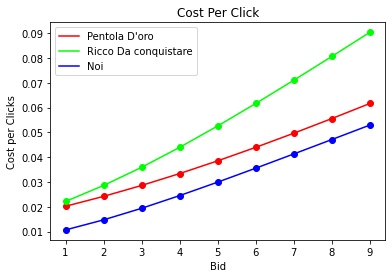

In [7]:
import matplotlib.pyplot as plt
import numpy as np

#Plotting of click function
X = np.arange(1, 10)
Y = []
for c in cManager.classes:
    Y.append([])
    for x in X:
        Y[c["class_id"]].append(cManager.cost_per_click(c["class_id"], bid = x, noise = False)) 


plt.figure()
colors = [[1,0,0] , [0,1,0 ], [0,0,1]]
for c in cManager.classes:    
    plt.plot(X, Y[c["class_id"]], color=colors[c["class_id"]], label = c["name"])
    
    plt.scatter(X, Y[c["class_id"]], color=colors[c["class_id"]])
    plt.title("Cost Per Click")
    plt.xlabel("Bid")
    plt.ylabel("Cost per Clicks")


plt.legend()
plt.show()


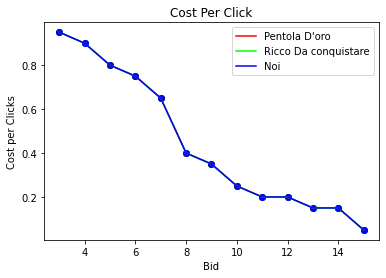

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
colors = [[1,0,0] , [0,1,0 ], [0,0,1]]
for c in cManager.classes:    
    plt.plot([i[0] for i in c["conversion_rate_matrix"]],
             [i[1] for i in c["conversion_rate_matrix"]], 
             color=colors[c["class_id"]], label = c["name"])
    
    plt.scatter([i[0] for i in c["conversion_rate_matrix"]],
                [i[1] for i in c["conversion_rate_matrix"]],
                color=colors[c["class_id"]])
    plt.title("Conversion Rate")
    plt.xlabel("Price")
    plt.ylabel("Conversion Probability")


plt.legend()
plt.show()

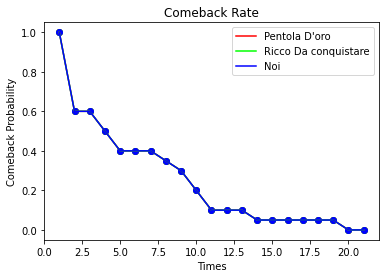

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
colors = [[1,0,0] , [0,1,0 ], [0,0,1]]

X = np.arange(1, 22)
Y = []

for c in cManager.classes:
    Y.append([])
    for x in X:
        Y[c["class_id"]].append(cManager.comeback_probability(c["class_id"], times = x, noise = False)) 


for c in cManager.classes:    
    plt.plot(X,
             Y[c["class_id"]], 
             color=colors[c["class_id"]], label = c["name"])
    
    plt.scatter(X,
                Y[c["class_id"]], 
                color=colors[c["class_id"]])
    plt.title("Comeback Rate")
    plt.xlabel("Times")
    plt.ylabel("Comeback Probability")


plt.legend()
plt.show()


#TODO : Fix the rates of comeback and the conversion 